<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Qiskit_Labs/blob/main/lab1_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 38.2 MB/s 
     |████████████████████████████████| 18.0 MB 45.2 MB/s 
     |████████████████████████████████| 240 kB 71.8 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 112 kB 59.6 MB/s 
     |████████████████████████████████| 943 kB 73.3 MB/s 
     |████████████████████████████████| 49 kB 8.3 MB/s 
     |████████████████████████████████| 49 kB 8.4 MB/s 
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
     |████████████████████████████████| 1.6 MB 65.7 MB/s 
     |████████████████████████████████| 4.0 MB 57.3 MB/s 
     |████████████████████████████████| 112 kB 75.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.2-py3-none-any.whl size=12109 sha256=a92899dd2ec57a41e832a02a4c80f371b6e4d6e10395531d036e52c68abb0ceb
  Stored in directory: /root/.cache/pip/wheels/e6/bd/f3/26c

# This is a program

In [ ]:
#!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 31.8 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=c0a4d43fcfaf51333de0320de5aca1d4ceb2e9167c47b14ac907533bd9fa7c6f
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


# Restart runtime after the installation

In [ ]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram



############# CREATE #####################
qr = QuantumRegister(1, 'qbit')
cr = ClassicalRegister(1, 'bit')
qc = QuantumCircuit(qr, cr)

qc.x(0)
qc.measure(0, 0)

qc.draw(output='mpl')
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qbit[1];
creg bit[1];
x qbit[0];
measure qbit[0] -> bit[0];



# Run the code on a real quantum computer
## IBMQ Backends

![](https://miro.medium.com/max/700/1*YuR-BtRRTxLQ5EXW8fbUEQ.png)

`Provider` - IBM Quantum Experience account provider. A server to ask about machines.

`Backend` - IBM Quantum Experience device. Quantum computer.

## Obtaining the token

Visit https://quantum-computing.ibm.com/account and get the key!

Visit https://quantum-computing.ibm.com/services?services=systems&systems=yours and choose a backend (1 bit is ok).

In [ ]:
from qiskit import IBMQ, execute

In [ ]:
token = "c23361866a06de98fbeedb284ff404cfec85459cd8db36ccce1d8e4f016e72d4556076e7b0b0ee393197a69ee7198f8d4d4b32e01ba31005395771a88eb705b8"

In [ ]:
IBMQ.save_account(token)

In [ ]:
IBMQ.load_account()

print("======== Provider list =======")
print(list(IBMQ.providers()))

provider = IBMQ.get_provider('ibm-q')
print("\n========== QPU list ==========")
print([
        (qpu.name(), qpu.configuration().n_qubits, qpu.status().pending_jobs) 
        for qpu in provider.backends()])

print("\n========== QPU info ==========")
machine = "ibmq_quito"               # try lima, belem, manila, quito 
qpu = provider.get_backend(machine) 

nq = qpu.configuration().n_qubits
my_limit = qpu.job_limit().maximum_jobs
my_jobs = qpu.job_limit().active_jobs

status = qpu.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Works = {is_operational}, Queue = {jobs_in_queue}, "
      f"My Job Limit = {my_jobs}/{my_limit}, Qubits = {nq}")

======== Provider list =======
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

========== QPU list ==========
[('ibmq_qasm_simulator', 32, 32), ('ibmq_lima', 5, 106), ('ibmq_belem', 5, 86), ('ibmq_quito', 5, 91), ('simulator_statevector', 32, 32), ('simulator_mps', 100, 32), ('simulator_extended_stabilizer', 63, 32), ('simulator_stabilizer', 5000, 32), ('ibmq_manila', 5, 106), ('ibm_nairobi', 7, 159), ('ibm_oslo', 7, 299)]

========== QPU info ==========
Works = True, Queue = 91, My Job Limit = 0/5, Qubits = 5


In [ ]:
qpu = provider.get_backend("ibmq_quito")
job = execute(qc, backend=qpu, shots=40)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


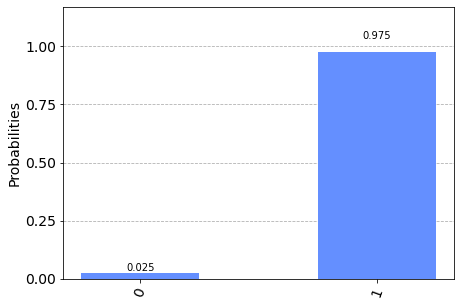

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)